In [1]:
!pip install yfinance

!pip install bs4


  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=81e87656d6be3f2c1c5675a0dce12993b8d1bff92e718afb8eb2442fce345f4c
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/77/8a/04/7b1a8ce5de6555a18e09370d3d4fde48be9571ac07a623071e
Successfully built bs4


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data['Date'], infer_datetime_format=True), y=stock_data['Close'], name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data['Date'], infer_datetime_format=True), y=revenue_data['Revenue'], name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()



In [4]:
tesla = yf.Ticker("TSLA")

In [5]:
tesla_data = tesla.history(period ="max")

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01"

html_data  = requests.get(url).text

In [8]:
soup = BeautifulSoup(html_data, 'html5lib')


In [9]:
table = soup.find('table') # in html table is represented by the tag <table>
tables = soup.find_all('table')

tesla_revenue = pd.DataFrame(columns=['Date','Revenue'])

for row in tables[1].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue

,Date,Revenue
0,2022-12-31,"$24,318"
1,2022-09-30,"$21,454"
2,2022-06-30,"$16,934"
3,2022-03-31,"$18,756"
4,2021-12-31,"$17,719"
5,2021-09-30,"$13,757"
6,2021-06-30,"$11,958"
7,2021-03-31,"$10,389"
8,2020-12-31,"$10,744"
9,2020-09-30,"$8,771"


In [13]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [14]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [15]:
tesla_revenue.tail(5)

,Date,Revenue
49,2010-09-30,31
50,2010-06-30,28
51,2010-03-31,21
53,2009-09-30,46
54,2009-06-30,27


In [16]:
game_stop = yf.Ticker("GME")
gme_data = game_stop.history(period ="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [17]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01"

html_data2 = requests.get(url).text

In [18]:
soup = BeautifulSoup(html_data2, 'html5lib')

In [19]:
gme_revenue = pd.read_html(url, match = 'GameStop Quarterly Revenue')

gme_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in soup.find_all("tbody")[1]('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
   
    
    gme_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)    

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]    
    
gme_revenue

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


,Date,Revenue
0,2022-12-31,24318
1,2022-09-30,21454
2,2022-06-30,16934
3,2022-03-31,18756
4,2021-12-31,17719
5,2021-09-30,13757
6,2021-06-30,11958
7,2021-03-31,10389
8,2020-12-31,10744
9,2020-09-30,8771


In [20]:
gme_revenue.tail(5)

,Date,Revenue
50,2010-06-30,28
51,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27
54,2009-01-31,3492


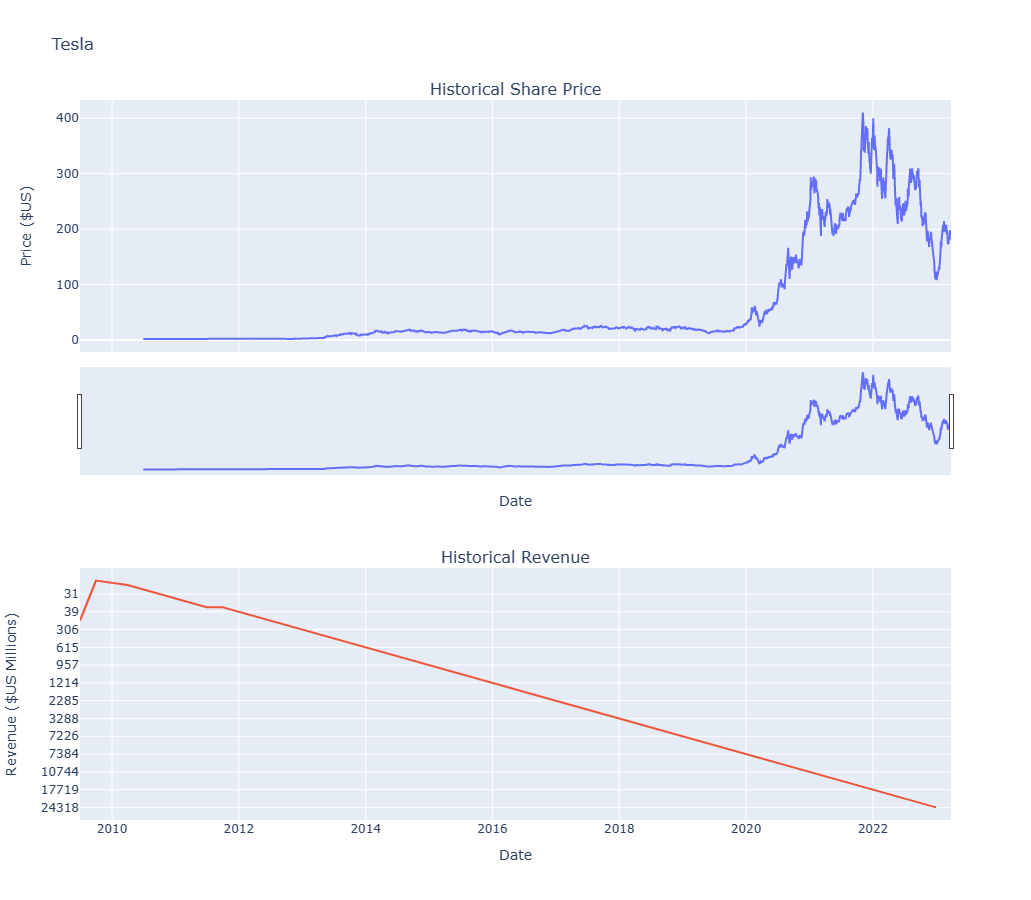

In [24]:
s = make_graph(tesla_data, tesla_revenue, 'Tesla')

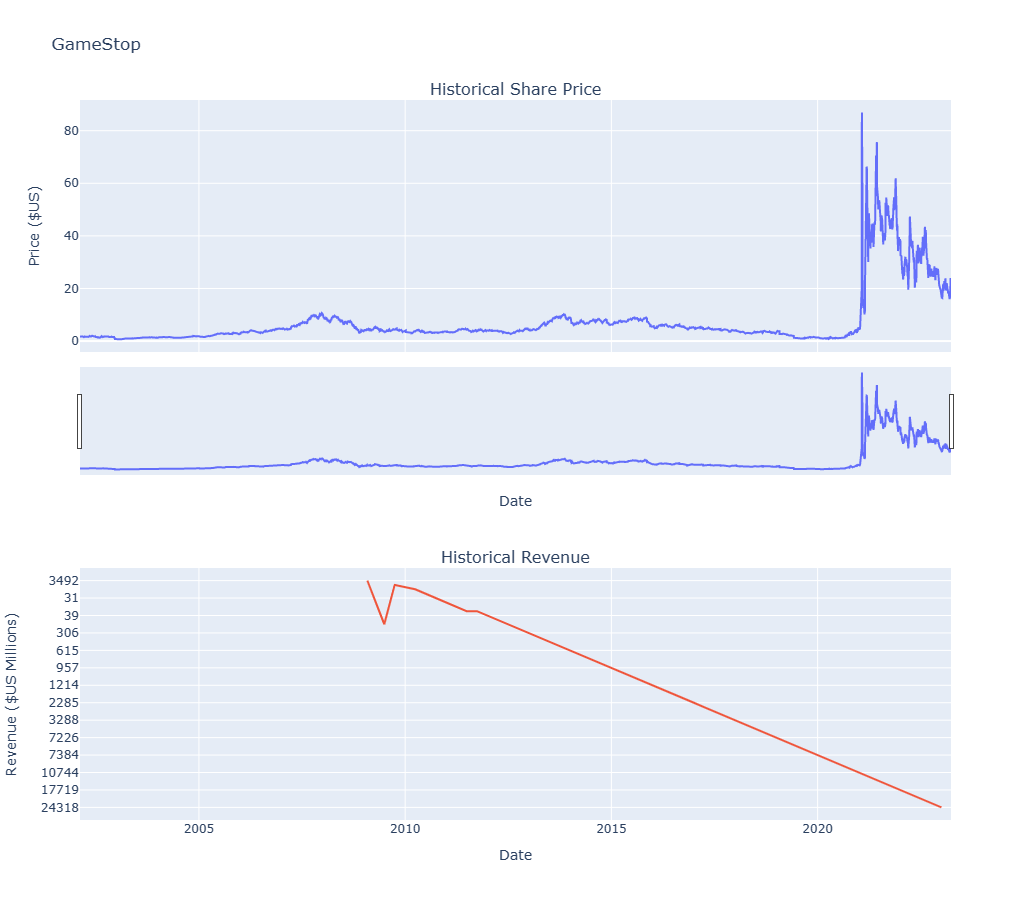

In [23]:
s = make_graph(gme_data, gme_revenue, 'GameStop')